In [85]:
#Import lib
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

loc = 'C:/Users/tchou/M2_Machine_Learning/TP_Regression/'

In [86]:
dataset = pd.read_csv(loc + "OnlineNewsPopularity.csv")


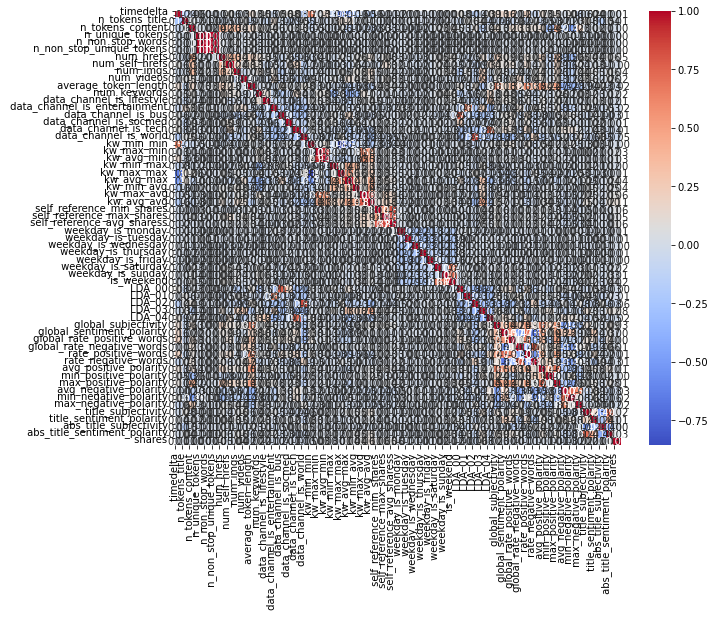

In [87]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [88]:
corr.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [89]:
corr[' shares'] = abs(corr[' shares'])

corr_list = corr[' shares'][:].sort_values(ascending=False)

corr_list = corr_list[0:10]
corr_list

 shares                        1.000000
 kw_avg_avg                    0.110413
 LDA_03                        0.083771
 kw_max_avg                    0.064306
 LDA_02                        0.059163
 self_reference_avg_sharess    0.057789
 self_reference_min_shares     0.055958
 data_channel_is_world         0.049497
 self_reference_max_shares     0.047115
 num_hrefs                     0.045404
Name:  shares, dtype: float64

In [90]:
dataset_clean = dataset[[' kw_avg_avg',' LDA_03',' kw_max_avg',' LDA_02',' self_reference_avg_sharess',' self_reference_min_shares',' self_reference_max_shares',' num_hrefs',' shares' ]]

In [91]:
corr_list = [i for i in corr_list.index]
corr_list

[' shares',
 ' kw_avg_avg',
 ' LDA_03',
 ' kw_max_avg',
 ' LDA_02',
 ' self_reference_avg_sharess',
 ' self_reference_min_shares',
 ' data_channel_is_world',
 ' self_reference_max_shares',
 ' num_hrefs']

In [92]:
dataset_clean = dataset[corr_list]
dataset_clean[' shares'] = dataset[' shares']

<ipython-input-92-a929750c7e3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean[' shares'] = dataset[' shares']


In [93]:
dataset_clean

,shares,kw_avg_avg,LDA_03,kw_max_avg,LDA_02,self_reference_avg_sharess,self_reference_min_shares,data_channel_is_world,self_reference_max_shares,num_hrefs
0,593,0.000000,0.041263,0.000000,0.040005,496.000000,496.0,0.0,496.0,4.0
1,711,0.000000,0.050101,0.000000,0.050096,0.000000,0.0,0.0,0.0,3.0
2,1500,0.000000,0.033334,0.000000,0.033351,918.000000,918.0,0.0,918.0,3.0
3,1200,0.000000,0.028905,0.000000,0.494651,0.000000,0.0,0.0,0.0,9.0
4,505,0.000000,0.028572,0.000000,0.028575,3151.157895,545.0,0.0,16000.0,19.0
...,...,...,...,...,...,...,...,...,...,...
39639,1800,3031.115764,0.025000,4004.342857,0.151701,37033.333333,11400.0,0.0,48000.0,9.0
39640,1900,3411.660830,0.681635,5470.168651,0.231866,2100.000000,2100.0,0.0,2100.0,9.0
39641,1900,4206.439195,0.643794,6880.687034,0.025207,1400.000000,1400.0,0.0,1400.0,24.0
39642,1100,1777.895883,0.040002,3384.316871,0.839987,452.000000,452.0,1.0,452.0,10.0


In [94]:
X = dataset_clean.drop(' shares', axis = 1).values
y = dataset_clean[' shares'].values.reshape(-1,1)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [96]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (31715, 9)
Shape of X_test:  (7929, 9)
Shape of y_train:  (31715, 1)
Shape of y_test (7929, 1)


In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
clf = RandomForestRegressor(max_depth=2, random_state=0)


clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)

rmse_rf_train = mean_squared_error(y_train, y_pred_train,squared=False)
print("Train set: ", rmse_rf_train)






y_pred_test = clf.predict(X_test)
rmse_rf_test = mean_squared_error(y_test,y_pred_test,squared=False)
print("Test set: ", rmse_rf_test)

<ipython-input-97-dff00dd40739>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Train set:  11619.596404960697
Test set:  10839.4988934684


In [98]:
dataset

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [99]:
date = dataset['url'][0]

In [100]:
x = date.split("/")
print(x)

['http:', '', 'mashable.com', '2013', '01', '07', 'amazon-instant-video-browser', '']


In [101]:
dataset['mois'] = 1
for i in range(len(dataset)):
    date = dataset['url'][i]
    x = date.split("/")
    dataset['mois'][i] = x[4]
     

<ipython-input-101-e031457fd16a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['mois'][i] = x[4]


In [102]:
dataset['mois']

0         1
1         1
2         1
3         1
4         1
         ..
39639    12
39640    12
39641    12
39642    12
39643    12
Name: mois, Length: 39644, dtype: int64

In [103]:
dataset_clean['mois'] = dataset['mois']

<ipython-input-103-17f219256d41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['mois'] = dataset['mois']


In [104]:
dataset_clean

,shares,kw_avg_avg,LDA_03,kw_max_avg,LDA_02,self_reference_avg_sharess,self_reference_min_shares,data_channel_is_world,self_reference_max_shares,num_hrefs,mois
0,593,0.000000,0.041263,0.000000,0.040005,496.000000,496.0,0.0,496.0,4.0,1
1,711,0.000000,0.050101,0.000000,0.050096,0.000000,0.0,0.0,0.0,3.0,1
2,1500,0.000000,0.033334,0.000000,0.033351,918.000000,918.0,0.0,918.0,3.0,1
3,1200,0.000000,0.028905,0.000000,0.494651,0.000000,0.0,0.0,0.0,9.0,1
4,505,0.000000,0.028572,0.000000,0.028575,3151.157895,545.0,0.0,16000.0,19.0,1
...,...,...,...,...,...,...,...,...,...,...,...
39639,1800,3031.115764,0.025000,4004.342857,0.151701,37033.333333,11400.0,0.0,48000.0,9.0,12
39640,1900,3411.660830,0.681635,5470.168651,0.231866,2100.000000,2100.0,0.0,2100.0,9.0,12
39641,1900,4206.439195,0.643794,6880.687034,0.025207,1400.000000,1400.0,0.0,1400.0,24.0,12
39642,1100,1777.895883,0.040002,3384.316871,0.839987,452.000000,452.0,1.0,452.0,10.0,12


In [105]:
X = dataset_clean.drop(' shares', axis = 1).values
y = dataset_clean[' shares'].values.reshape(-1,1)

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [107]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (31715, 10)
Shape of X_test:  (7929, 10)
Shape of y_train:  (31715, 1)
Shape of y_test (7929, 1)


In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
clf = RandomForestRegressor(max_depth=2, random_state=0)


clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)

rmse_rf_train = mean_squared_error(y_train, y_pred_train,squared=False)
print("Train set: ", rmse_rf_train)


y_pred_test = clf.predict(X_test)
rmse_rf_test = mean_squared_error(y_test,y_pred_test,squared=False)
print("Test set: ", rmse_rf_test)

<ipython-input-108-a2947acc99c1>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Train set:  11619.596404960697
Test set:  10839.4988934684


In [117]:
import xgboost as xgb

clf = xgb.XGBRegressor(n_estimators=500, max_depth=5, eta=0.1, subsample=0.7, colsample_bytree=0.8) 
clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)

rmse_rf_train = mean_squared_error(y_train, y_pred_train,squared=False)
print("Train set: ", rmse_rf_train)


y_pred_test = clf.predict(X_test)
rmse_rf_test = mean_squared_error(y_test,y_pred_test,squared=False)
print("Test set: ", rmse_rf_test)

Train set:  4976.091515291981
Test set:  11602.80792172086
